In [8]:
import numpy as np
import matplotlib.pyplot as plt

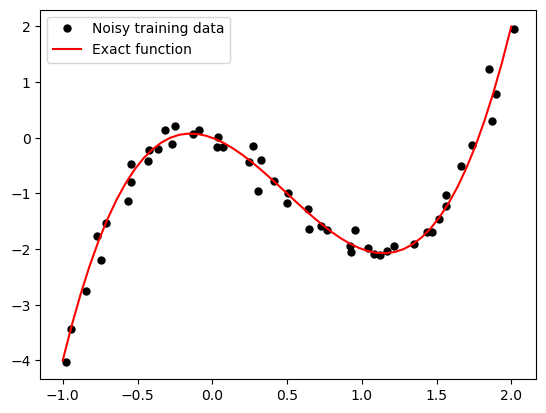

In [9]:
def model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

n_samples = 51
a, b, c, d = 2, -3, -1, 0

x = np.linspace(-1, 2, n_samples)
y = model(x, a, b, c, d)

np.random.seed(42)
x_data = x + np.random.randn(n_samples) * 0.05
y_data = y + np.random.randn(n_samples) * 0.1

plt.plot(x_data, y_data, 'ko', ms=5, label='Noisy training data')
plt.plot(x, y, 'r-', label='Exact function')
plt.legend()
plt.show()

### Polynomial Model

In [10]:
# Analytical Solution
x, y = x_data, y_data
X = np.vstack([x**3, x**2, x, np.ones_like(x)]).T

# Normal Equation: (X^T X)^(-1) X^T y
params = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
params

array([ 2.00789264, -3.04407624, -0.92424109, -0.02220862])

In [11]:
def r2_score(y_true, y_pred):
    sst = np.sum((y_true - y_true.mean())**2)    # Total sum of squares
    ssr = np.sum((y_true - y_pred)**2)           # Residual sum of squares
    return 1 - (ssr / sst)

learning_rate = 0.01
n_epoches = 10000

a, b, c, d = 0.1, 0.1, 0.1, 0.1
x, y = x_data, y_data

for epoch in range(1, n_epoches + 1):
    y_pred = model(x, a, b, c, d)
    loss = np.mean((y - y_pred)**2)
    score = r2_score(y, y_pred)

    grad_a = -2 * np.mean(x**3 * (y - y_pred))
    grad_b = -2 * np.mean(x**2 * (y - y_pred))
    grad_c = -2 * np.mean(x * (y - y_pred))
    grad_d = -2 * np.mean(y - y_pred)

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    if epoch % (n_epoches // 10) == 0:
        print(f"Epoch[{epoch:5d}/{n_epoches}] loss={loss:.3f}, score={score:.3f}, a={a:.3f}, b={b:.3f}, c={c:.3f}, d={d:.3f}")

Epoch[ 1000/10000] loss=0.101, score=0.919, a=1.566, b=-2.264, c=-0.739, d=-0.362
Epoch[ 2000/10000] loss=0.044, score=0.964, a=1.886, b=-2.827, c=-0.874, d=-0.117
Epoch[ 3000/10000] loss=0.040, score=0.968, a=1.974, b=-2.984, c=-0.910, d=-0.048
Epoch[ 4000/10000] loss=0.039, score=0.968, a=1.999, b=-3.027, c=-0.920, d=-0.029
Epoch[ 5000/10000] loss=0.039, score=0.968, a=2.005, b=-3.039, c=-0.923, d=-0.024
Epoch[ 6000/10000] loss=0.039, score=0.968, a=2.007, b=-3.043, c=-0.924, d=-0.023
Epoch[ 7000/10000] loss=0.039, score=0.968, a=2.008, b=-3.044, c=-0.924, d=-0.022
Epoch[ 8000/10000] loss=0.039, score=0.968, a=2.008, b=-3.044, c=-0.924, d=-0.022
Epoch[ 9000/10000] loss=0.039, score=0.968, a=2.008, b=-3.044, c=-0.924, d=-0.022
Epoch[10000/10000] loss=0.039, score=0.968, a=2.008, b=-3.044, c=-0.924, d=-0.022


### Neural Network Model - numpy

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity(x):
    return x

def r2_score(y_true, y_pred):
    sst = np.sum((y_true - y_true.mean())**2)    # Total sum of squares
    ssr = np.sum((y_true - y_pred)**2)           # Residual sum of squares
    return 1 - (ssr / sst)

## Preprocess
x, y = x_data.reshape(-1, 1), y_data.reshape(-1, 1)
print(x.shape, y.shape)

## Model - 2-layer MLP
np.random.seed(42)

w1 = np.random.randn(1, 50)     # weight of 1st layer
b1 = np.zeros(50)               # bias of 1st layer
w2 = np.random.randn(50, 1)     # weight of 2nd layer
b2 = np.zeros(1)                # bias of 2nd layer

(51, 1) (51, 1)


In [41]:
n_epochs = 10000
learning_rate = 0.1

for epoch in range(1, n_epochs + 1):
    # Forward propagation
    a0 = x
    z1 = np.dot(a0, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = identity(z2)

    loss = np.mean((a2 - y)**2)
    score = r2_score(a2, y)

    # Backward propagation
    grad_a2 = 2 * (a2 - y) / len(y)
    grad_z2 = grad_a2 * 1
    grad_a1 = np.dot(grad_z2, w2.T)
    grad_z1 = grad_a1 * a1 * (1 - a1)
    grad_a0 = np.dot(grad_z1, w1.T)

    grad_w2 = np.dot(a1.T, grad_z2)
    grad_b2 = np.sum(grad_z2, axis=0)
    grad_w1 = np.dot(a0.T, grad_z1)
    grad_b1 = np.sum(grad_z1, axis=0)

    # Update weights and biases
    w1 -= learning_rate * grad_w1
    b1 -= learning_rate * grad_b1
    w2 -= learning_rate * grad_w2
    b2 -= learning_rate * grad_b2

    if epoch % (n_epochs // 10) == 0:
        print(f"[{epoch:5d}/{n_epochs}] loss: {loss.item():.3f} score: {score:.3f}")

[ 1000/10000] loss: 0.150 score: 0.842
[ 2000/10000] loss: 0.078 score: 0.926
[ 3000/10000] loss: 0.051 score: 0.954
[ 4000/10000] loss: 0.042 score: 0.964
[ 5000/10000] loss: 0.039 score: 0.967
[ 6000/10000] loss: 0.038 score: 0.968
[ 7000/10000] loss: 0.038 score: 0.968
[ 8000/10000] loss: 0.037 score: 0.969
[ 9000/10000] loss: 0.037 score: 0.969
[10000/10000] loss: 0.037 score: 0.969


### Neural Network Model - pytorch

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    """ 2-layer MLP with sigmoid activation function """
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 50),
            nn.Sigmoid(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.layers(x)
    
def r2_score(y_true, y_pred):
    sst = torch.sum((y_true - y_true.mean())**2)    # Total sum of squares
    ssr = torch.sum((y_true - y_pred)**2)           # Residual sum of squares
    return 1 - (ssr / sst)    

In [44]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

x_tensor = torch.tensor(x_data).float().view(-1, 1)
y_tensor = torch.tensor(y_data).float().view(-1, 1)

n_epoches = 10000
for epoch in range(1, n_epoches + 1):
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)
    score = r2_score(y_tensor, y_pred)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % (n_epoches // 10) == 0:
        print(f"Epoch[{epoch:5d}/{n_epoches}] loss={loss.item():.3f}, score={score.item():.3f}")

Epoch[ 1000/10000] loss=1.154, score=0.067
Epoch[ 2000/10000] loss=0.274, score=0.778
Epoch[ 3000/10000] loss=0.130, score=0.895
Epoch[ 4000/10000] loss=0.079, score=0.936
Epoch[ 5000/10000] loss=0.057, score=0.954
Epoch[ 6000/10000] loss=0.047, score=0.962
Epoch[ 7000/10000] loss=0.042, score=0.966
Epoch[ 8000/10000] loss=0.040, score=0.968
Epoch[ 9000/10000] loss=0.038, score=0.969
Epoch[10000/10000] loss=0.038, score=0.970
